In [ ]:
# 1. 결측치, 이상치 제거
# 2. EDA (데이터분포 및 전처리 특징파악 등)
# 3. Feature Selection
# 4. 분석모델 개발(분류/회귀)
# 5. 예측 성능 값 도출

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/kingcountyprice/x_test.csv")


display(x_train.head())
display(y_train.head())
print(x_train.dtypes)
print(x_train.info())

,ID,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2,8651400730,20150428T000000,3,1.00,840,5525,1.0,0,0,...,6,840,0,1969,0,98042,47.3607,-122.085,920,5330
1,3,3163600130,20150317T000000,3,1.00,1250,8000,1.0,0,0,...,7,1250,0,1956,0,98146,47.5065,-122.337,1040,6973
2,4,5045700330,20140725T000000,4,2.50,2200,6400,2.0,0,0,...,8,2200,0,2010,0,98059,47.4856,-122.156,2600,5870
3,5,1036100130,20140808T000000,3,2.50,1980,39932,2.0,0,0,...,8,1980,0,1994,0,98011,47.7433,-122.196,2610,12769
4,6,7696630080,20140506T000000,3,1.75,1690,7735,1.0,0,0,...,7,1060,630,1976,0,98001,47.3324,-122.280,1580,7503


,ID,price
0,2,191000.0
1,3,234900.0
2,4,460000.0
3,5,442000.0
4,6,197000.0


ID                 int64
id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  


In [3]:
x_train.value_counts()
cols = x_train.columns
for col in cols:
    tmp = x_train[col].unique()
    print(f'{col} : {len(tmp)}')
print(cols)

x_train.describe()

print('Rows : ',len(x_train))

ID : 17290
id : 17175
date : 369
bedrooms : 13
bathrooms : 30
sqft_living : 933
sqft_lot : 8443
floors : 6
waterfront : 2
view : 5
condition : 5
grade : 12
sqft_above : 852
sqft_basement : 284
yr_built : 116
yr_renovated : 68
zipcode : 70
lat : 4827
long : 727
sqft_living15 : 715
sqft_lot15 : 7492
Index(['ID', 'id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
Rows :  17290


In [4]:
x_train[x_train.isna().any(axis=1)] 
x_train = x_train.dropna()

In [5]:

cols_num = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15'] # ID, id, date
cols_cg = ['waterfront','view','zipcode'] # zipcode

# 수치형 & 카테고리형 분류
tmp_num = x_train[cols_num]
tmp_cg = x_train[cols_cg]


In [6]:

# scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tmp_num_scaled = scaler.fit_transform(tmp_num)
tmp_num_scaled = pd.DataFrame(tmp_num_scaled, columns=cols_num)
tmp_num_scaled
# plt.scatter(tmp_num_scaled[:,0],tmp_num_scaled[:,1])
# plt.show()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,-0.393954,-1.439691,-1.340837,-0.230094,-0.912296,2.427260,-1.404273,-1.139533,-0.657155,-0.061961,-0.209951,-1.437703,0.924771,-1.557522,-0.273142
1,-0.393954,-1.439691,-0.897766,-0.170002,-0.912296,-0.628799,-0.556808,-0.647467,-0.657155,-0.503007,-0.209951,-0.385624,-0.872239,-1.382116,-0.212212
2,0.667518,0.496018,0.128862,-0.208849,0.940152,-0.628799,0.290657,0.492685,-0.657155,1.329032,-0.209951,-0.536436,0.418471,0.898166,-0.253117
3,-0.393954,0.496018,-0.108883,0.605301,0.940152,-0.628799,0.290657,0.228650,-0.657155,0.786206,-0.209951,1.323104,0.133231,0.912783,0.002730
4,-0.393954,-0.471836,-0.422275,-0.176436,-0.912296,0.899231,-0.556808,-0.875498,0.764222,0.175526,-0.209951,-1.641913,-0.465773,-0.592788,-0.192558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,-0.393954,-0.794454,-0.260176,-0.098231,-0.912296,0.899231,0.290657,0.060628,-0.657155,-0.028034,-0.209951,0.827371,0.361423,-0.446616,-0.064727
17286,-0.393954,-0.149218,-0.951799,-0.315292,-0.912296,0.899231,-0.556808,-1.427572,0.696537,-1.351174,-0.209951,0.152683,-1.350016,-0.373530,-0.303181
17287,-0.393954,0.496018,0.107249,0.011708,-0.912296,-0.628799,0.290657,0.468682,-0.657155,0.718352,-0.209951,-2.100845,-0.672572,0.152689,-0.071217
17288,1.728989,0.818637,1.025811,-0.194281,-0.912296,0.899231,-0.556808,-0.299421,2.704514,0.243379,-0.209951,-1.398737,-0.465773,-0.285827,-0.198973


In [7]:

# one-hot encoding
from sklearn.preprocessing import LabelEncoder

# tmp_cg_labeled = pd.DataFrame(columns=cols_cg)
tmp_cg_oh = pd.get_dummies(tmp_cg,columns=cols_cg)
tmp_cg_oh
# for col_cg in cols_cg:
#     # 라벨 인코더 생성
#     encoder = LabelEncoder()
#     # X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
#     encoder.fit(tmp_cg[col_cg])
#     tmp_encoded = encoder.transform(tmp_cg[col_cg])
#     print(encoder.classes_)
#     tmp_df = pd.DataFrame(tmp_encoded,columns=encoder.classes_)
#     print(tmp_df)
#     pd.concat([tmp_cg_labeled,tmp_encoded],axis=1)
# tmp_cg_labeled


# X_test데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가한다 (중요!!!)
# for label in np.unique(X_test):
#     if label not in encoder.classes_: # unseen label 데이터인 경우( )
#         encoder.classes_ = np.append(encoder.classes_, label) # 미처리 시 ValueError발생
# X_test_encoded = encoder.transform(X_test)

# encoder.fit(tmp_cg)
# tmp_cg_encoded = encoder.transform(tmp_cg)
# tmp_cg_encoded
# tmp_cg_labeled = pd.get_dummies(tmp_cg)

# pd.concat([tmp_num_scaled,tmp_cg_labeled],axis=1)
# tmp_cg_labeled


,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17286,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17287,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
17288,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


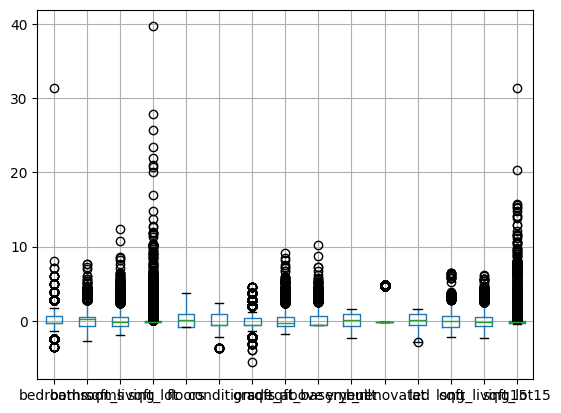

In [8]:
tmp_num_scaled.boxplot()
plt.show()

In [9]:
X = pd.concat([tmp_num_scaled,tmp_cg_oh],axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.393954,-1.439691,-1.340837,-0.230094,-0.912296,2.427260,-1.404273,-1.139533,-0.657155,-0.061961,...,False,False,False,False,False,False,False,False,False,False
1,-0.393954,-1.439691,-0.897766,-0.170002,-0.912296,-0.628799,-0.556808,-0.647467,-0.657155,-0.503007,...,True,False,False,False,False,False,False,False,False,False
2,0.667518,0.496018,0.128862,-0.208849,0.940152,-0.628799,0.290657,0.492685,-0.657155,1.329032,...,False,False,False,False,False,False,False,False,False,False
3,-0.393954,0.496018,-0.108883,0.605301,0.940152,-0.628799,0.290657,0.228650,-0.657155,0.786206,...,False,False,False,False,False,False,False,False,False,False
4,-0.393954,-0.471836,-0.422275,-0.176436,-0.912296,0.899231,-0.556808,-0.875498,0.764222,0.175526,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,-0.393954,-0.794454,-0.260176,-0.098231,-0.912296,0.899231,0.290657,0.060628,-0.657155,-0.028034,...,False,False,False,False,False,False,False,False,False,False
17286,-0.393954,-0.149218,-0.951799,-0.315292,-0.912296,0.899231,-0.556808,-1.427572,0.696537,-1.351174,...,False,False,False,False,False,False,False,False,False,False
17287,-0.393954,0.496018,0.107249,0.011708,-0.912296,-0.628799,0.290657,0.468682,-0.657155,0.718352,...,False,False,False,False,False,False,False,False,False,False
17288,1.728989,0.818637,1.025811,-0.194281,-0.912296,0.899231,-0.556808,-0.299421,2.704514,0.243379,...,False,False,False,False,False,False,False,False,False,False


In [10]:
y = y_train['price']

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train,X_test,Y_train,Y_test = train_test_split(X,y)

model = LinearRegression().fit(X_train,Y_train)
y_pred = model.predict(X_test)
model.score(X_test,Y_test)

0.8007356354797907

In [16]:
from sklearn.ensemble import RandomForestRegressor

params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, Y_train)
 

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': (5, 8), 'min_samples_leaf': (8, 18),
                         'min_samples_split': (8, 16),
                         'n_estimators': (100, 200)})

In [17]:
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최적 예측 정확도: 0.8109


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV

#모델들을 할당할 리스트를 만들어줍니다.
estimators = []

#estimators 리스트에 모델들을 추가해줍니다.
rf = RandomForestRegressor()
estimators.append(rf)

gbr = GradientBoostingRegressor()
estimators.append(gbr)

etr = ExtraTreesRegressor()
estimators.append(etr)

#모들의 파라미터들을 할당할 리스트를 만들어줍니다.
params = []

# params 리스트에 성능을 비교하고자하는 파라미터들 추가해줍니다.
params_rf = {'n_estimators' : [90, 100, 110, 120],
            'min_samples_split' : [1,2,3,4]}
params.append(params_rf)

params_gbr = {'loss' : ['huber', 'quantile'],
             'learning_rate':[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15],
             'n_estimators':[60,70,80,90,100,110,120,130,140,150]}
params.append(params_gbr)

params_etr = {'n_estimators' : [50,60,70,80,90,100,110,120,130,140,150]}
params.append(params_etr)

#GridSearchCV 를 이용해 모델들을 최적화시켜줍니다.
from tqdm.auto import tqdm
def gridSearchCV(models,params):
    best_models=[]
    for i in tqdm(range(0,len(models))):
        model_grid = GridSearchCV(models[i], params[i],n_jobs = -1, verbose=1, cv=5)
        model_grid.fit(X,y)
        best_models.append(model_grid.best_estimator_)
    return best_models

best_model_list = gridSearchCV(estimators,params)

  0%|                                                                                                                                                                                                                                  | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [9]:
x_train.boxplot()


tmp_num = 

<Axes: >

# Data Analysis

In [51]:
# 데이터 확인`

x_train.info()
x_train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

,ID,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,10769.970677,4.591744e+09,3.371139,2.115630,2080.756102,1.500177e+04,1.492481,0.007056,0.234818,3.411510,7.657027,1789.483806,291.272296,1970.826316,84.277906,98078.157027,47.559941,-122.214683,1985.541469,12695.379352
std,6248.532999,2.879005e+09,0.942116,0.774932,925.386285,4.118767e+04,0.539842,0.083706,0.766008,0.654457,1.180024,833.245831,443.245022,29.476197,401.428964,53.578815,0.138587,0.140237,684.145780,26966.117359
min,2.000000,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,5356.250000,2.126059e+09,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10707.500000,3.905040e+09,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571600,-122.232000,1840.000000,7620.000000
75%,16198.750000,7.327500e+09,4.000000,2.500000,2550.000000,1.069675e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1996.000000,0.000000,98118.000000,47.677675,-122.126000,2360.000000,10073.250000
max,21612.000000,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [53]:

# 결측치 확인
x_train.isna().any()
x_train.isna().sum()


ID               0
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [56]:

# 결측 처리
X_train.dropna(axis=0) # 결측 개수 적을 때
X_train['결측컬럼'].fillna(value=X_train['결측컬럼'].mean()) # 결측 개수 많을 때


NameError: name 'X_train' is not defined

In [71]:
x_train.iloc[:,3:]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,840,5525,1.0,0,0,5,6,840,0,1969,0,98042,47.3607,-122.085,920,5330
1,3,1.00,1250,8000,1.0,0,0,3,7,1250,0,1956,0,98146,47.5065,-122.337,1040,6973
2,4,2.50,2200,6400,2.0,0,0,3,8,2200,0,2010,0,98059,47.4856,-122.156,2600,5870
3,3,2.50,1980,39932,2.0,0,0,3,8,1980,0,1994,0,98011,47.7433,-122.196,2610,12769
4,3,1.75,1690,7735,1.0,0,0,4,7,1060,630,1976,0,98001,47.3324,-122.280,1580,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,3,1.50,1840,10956,1.0,0,0,4,8,1840,0,1970,0,98033,47.6746,-122.164,1680,10950
17286,3,2.00,1200,2016,1.0,0,1,4,7,600,600,1931,0,98116,47.5811,-122.404,1730,4520
17287,3,2.50,2180,15484,1.0,0,0,3,8,2180,0,1992,0,98003,47.2688,-122.309,2090,10775
17288,5,2.75,3030,7000,1.0,0,0,4,7,1540,1490,1978,0,98032,47.3661,-122.280,1790,7330


In [84]:

# 수치형 정규화
X_train=x_train.iloc[:,3:]

cate_cols = ['waterfront','view'] #cols_cg # ['문자컬럼1', '문자컬럼2']

tmp = X_train.copy()
X_train_num = tmp.drop(cate_cols, axis=1)

# 전처리 Robust , MinMaxScaler
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

rb_scaler = RobustScaler()
mM_scaler=MinMaxScaler()
std_scaler = StandardScaler()

rb = rb_scaler.fit_transform(X_train_num)
mM = mM_scaler.fit_transform(rb)
mM = pd.DataFrame(mM,columns=X_train_num.columns)

# 범주형 onehot
cate_1 = X_train['waterfront'].unique()
print(cate_1)

cate_1_name = []
for i in cate_1:
	cate_1_name.append(f'{cols_cg[0]}_{i}')
print(cate_1_name)
onehot_1 = pd.get_dummies(X_train,columns=['waterfront']) # ,columns=cate_1_name)

cate_2 = X_train['view'].unique()
cate_2_name = []
for i in cate_2:
	cate_2_name.append(f'{cols_cg[1]}_{i}')
onehot_2 = pd.get_dummies(X_train,columns=['view']) # ,columns=cate_2_name)

# 데이터병합
X = pd.concat([mM,onehot_1,onehot_2],axis=1)
y = y_train['price']


# 모델

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

LogReg = LogisticRegression(solver='liblinear')
SVC = SVC(C=10,gamma=1)
KNeighbors = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
DecisionTree = DecisionTreeClassifier(max_depth=3)
MLP = MLPClassifier(hidden_layer_sizes=[2,10],max_iter=100)
RandomForest = RandomForestClassifier(max_depth=3,n_estimators=10)

models = [LogReg,SVC,KNeighbors,DecisionTree,MLP,RandomForest]

scores = {}
for i in range(len(models)):
	model = models[i]
	model_nm = str(model)
	model.fit(X,y)
	scores[model_nm]=model.score(X,y)
	print(model_nm + scores[model])	 


pred = model.predict(x_test)
pred_proba = model.predict_proba(x_test)
pred_proba = pd.DataFrame(pred_proba)
tgt_proba = pred_proba[1]

res = pd.DateFrame({'cust_id':x_test.cust_id,'target':tgt_proba}).to_csv('filename.csv',index=False)

[0 1]
['waterfront_0', 'waterfront_1']


In [82]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,...,long,sqft_living15,sqft_lot15,0,1,0,1,2,3,4
0,0.090909,0.12500,0.041509,0.003032,0.0,1.00,0.416667,0.060307,0.000000,0.600000,...,0.360465,0.089658,0.005457,True,False,True,False,False,False,False
1,0.090909,0.12500,0.072453,0.004531,0.0,0.50,0.500000,0.105263,0.000000,0.486957,...,0.151163,0.110308,0.007373,True,False,True,False,False,False,False
2,0.121212,0.31250,0.144151,0.003562,0.4,0.50,0.583333,0.209430,0.000000,0.956522,...,0.301495,0.378764,0.006086,True,False,True,False,False,False,False
3,0.090909,0.31250,0.127547,0.023874,0.4,0.50,0.583333,0.185307,0.000000,0.817391,...,0.268272,0.380485,0.014132,True,False,True,False,False,False,False
4,0.090909,0.21875,0.105660,0.004371,0.0,0.75,0.500000,0.084430,0.130705,0.660870,...,0.198505,0.203235,0.007991,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,0.090909,0.18750,0.116981,0.006322,0.0,0.75,0.583333,0.169956,0.000000,0.608696,...,0.294850,0.220444,0.012011,True,False,True,False,False,False,False
17286,0.090909,0.25000,0.068679,0.000906,0.0,0.75,0.500000,0.033991,0.124481,0.269565,...,0.095515,0.229048,0.004512,True,False,False,True,False,False,False
17287,0.090909,0.31250,0.142642,0.009064,0.0,0.50,0.583333,0.207237,0.000000,0.800000,...,0.174419,0.291000,0.011807,True,False,True,False,False,False,False
17288,0.151515,0.34375,0.206792,0.003925,0.0,0.75,0.500000,0.137061,0.309129,0.678261,...,0.198505,0.239374,0.007789,True,False,True,False,False,False,False
